## LLE

### Using Stemming

In [127]:
from sklearn.manifold import LocallyLinearEmbedding

In [128]:
n_components = [1, 2, 3, 5, 7, 10, 20, 30]
reconstruction_error = []
for n in n_components:
    lle_model = LocallyLinearEmbedding(n_components=n, random_state=0)
    lle_test = lle_model.fit_transform(test_embedding_stem.iloc[:,:].values)
    reconstruction_error.append(lle_model.reconstruction_error_)

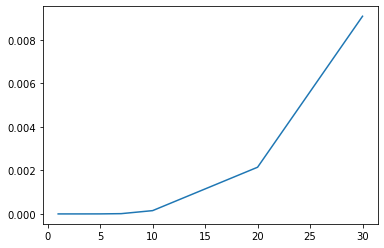

In [129]:
plt.plot(n_components, reconstruction_error)

In [130]:
lle_model = LocallyLinearEmbedding(n_components=4, random_state=0)
lle_test = lle_model.fit_transform(test_embedding_stem.iloc[:,:].values)

lle_test = pd.DataFrame(lle_test, columns = ["feature1", "feature2", "feature3", "feature4"])
lle_test.index = test_embedding_stem.index

In [131]:
lle_test.head()

,feature1,feature2,feature3,feature4
Word,,,,
trenberth,-0.029957,-0.004687,0.015359,0.034313
view,-0.029953,-0.020470,0.003220,-0.005520
clarifi,0.003969,-0.011832,-0.000027,-0.001783
paper,-0.029957,-0.004314,-0.009181,-0.039003
imper,-0.029960,0.007186,0.014842,0.035420


In [132]:
lle_model.reconstruction_error_

2.944359641946908e-07

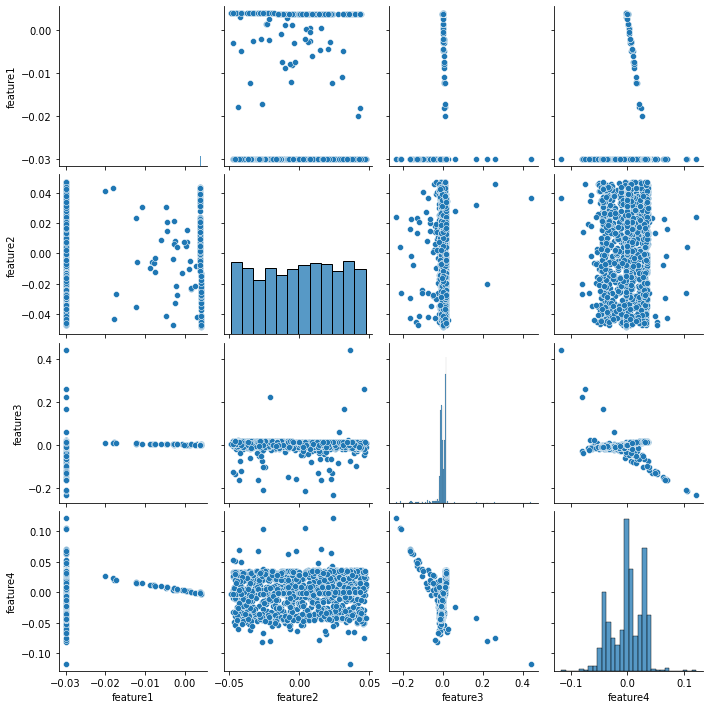

In [133]:
sns.pairplot(lle_test)

### Using Lemmatization

In [134]:
n_components = [1, 2, 3, 5, 7, 10, 20, 30]
reconstruction_error = []
for n in n_components:
    lle_model = LocallyLinearEmbedding(n_components=n, random_state=0)
    lle_test_lem = lle_model.fit_transform(test_embedding_lem.iloc[:,:].values)
    reconstruction_error.append(lle_model.reconstruction_error_)

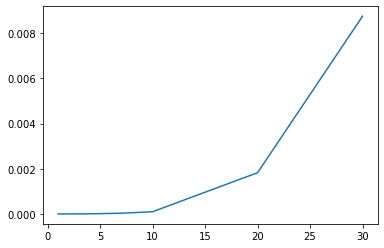

In [135]:
plt.plot(n_components, reconstruction_error)

In [136]:
lle_model = LocallyLinearEmbedding(n_components=4, random_state=0)
lle_test_lem = lle_model.fit_transform(test_embedding_lem.iloc[:,1:].values)

lle_test_lem = pd.DataFrame(lle_test_lem, columns = ["feature1", "feature2", "feature3", "feature4"])
lle_test_lem.index = test_embedding_lem.index

In [137]:
lle_test_lem.head()

,feature1,feature2,feature3,feature4
Word,,,,
trenberth,-0.002661,-0.008774,0.041017,-0.034437
view,-0.000729,0.030070,-0.006766,0.020809
clarify,-0.002803,-0.034277,-0.021374,0.011559
paper,-0.003029,0.039252,-0.066143,-0.075211
imperative,-0.002803,-0.034223,-0.021245,0.011436


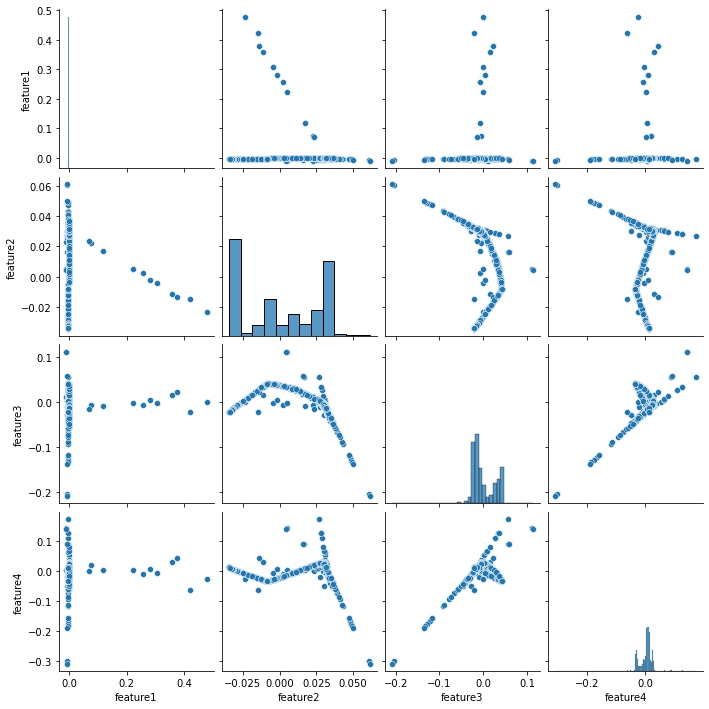

In [138]:
sns.pairplot(lle_test_lem)

In [139]:
lle_model.reconstruction_error_

1.4928941515072205e-06

#### Getting Cosine similarity between all  words [STEMMING]

In [140]:
cos_sim_lle = cosine_similarity(lle_test.iloc[:,:].values, Y=None, dense_output=False)

In [141]:
cos_sim_lle.shape

(1291, 1291)

In [142]:
cos_sim_lle = pd.DataFrame(cos_sim_lle, columns = list(lle_test.index), index = list(lle_test.index))
cos_sim_lle

,trenberth,view,clarifi,paper,imper,climat,chang,plan,track,earth,...,tropospher,moreov,coldest,donald,hoax,classic,feast,follow,coupl,recoveri
trenberth,1.000000,0.479582,-0.205315,-0.231592,0.970230,-0.166163,-0.161578,0.185571,0.781918,-0.173712,...,0.272079,-0.166698,0.680777,0.866481,0.763915,0.754270,-0.327318,-0.296822,0.721854,0.897420
view,0.479582,1.000000,0.286591,0.633226,0.332213,0.738035,0.552823,0.934475,0.721109,0.489663,...,0.955494,-0.632753,0.004126,0.212035,0.729591,0.022492,-0.751854,0.090495,0.414421,0.235762
clarifi,-0.205315,0.286591,1.000000,0.003061,-0.430918,0.172915,-0.238584,0.550000,0.434816,-0.315778,...,0.217201,-0.905309,-0.854342,-0.665127,0.457879,-0.788492,-0.805077,-0.624222,-0.705856,-0.614354
paper,-0.231592,0.633226,0.003061,1.000000,-0.263402,0.975402,0.965732,0.684029,-0.076478,0.942114,...,0.809607,-0.134526,-0.167724,-0.187292,-0.061633,-0.249857,-0.185996,0.730544,0.221763,-0.214601
imper,0.970230,0.332213,-0.430918,-0.263402,1.000000,-0.244491,-0.139259,-0.001861,0.607672,-0.129626,...,0.151166,0.076989,0.835747,0.959137,0.584920,0.890629,-0.090604,-0.155129,0.816589,0.976228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
classic,0.754270,0.022492,-0.788492,-0.249857,0.890629,-0.323467,-0.045258,-0.333427,0.181188,0.005230,...,-0.075949,0.520335,0.991683,0.977548,0.153558,1.000000,0.364387,0.160286,0.875370,0.964879
feast,-0.327318,-0.751854,-0.805077,-0.185996,-0.090604,-0.378140,0.003316,-0.839614,-0.840683,0.097626,...,-0.626736,0.980795,0.443348,0.164533,-0.856035,0.364387,1.000000,0.521034,0.160358,0.107637
follow,-0.296822,0.090495,-0.624222,0.730544,-0.155129,0.575547,0.849601,0.025779,-0.569940,0.897701,...,0.309312,0.578078,0.281712,0.086547,-0.570636,0.160286,0.521034,1.000000,0.431531,0.024507
coupl,0.721854,0.414421,-0.705856,0.221763,0.816589,0.149900,0.382219,0.076261,0.267991,0.432032,...,0.361454,0.346910,0.895477,0.909918,0.248454,0.875370,0.160358,0.431531,1.000000,0.891253


#### Comparing most similar words in LLE to Word2Vec most similar words [STEMMING]

In [143]:
cos_most_sim_lle_stem = get_most_similar_words(cos_sim_lle, n_similar=5)
cos_most_sim_lle_stem.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,latest,denier,habit,causal,incorrect
view,fund,pass,larger,explain,variou
clarifi,harbour,terrain,stalagmit,bere,cherri
paper,protect,much,deforest,act,winter
imper,ran,partli,lawrenc,odorless,geoscienc


In [144]:
# create a dataframe of similar words if cosine similarity > cos_threshold
cos_sim_lle = (cos_sim_lle > cos_threshold).astype(int)
cos_sim_lle.head()

,trenberth,view,clarifi,paper,imper,climat,chang,plan,track,earth,...,tropospher,moreov,coldest,donald,hoax,classic,feast,follow,coupl,recoveri
trenberth,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clarifi,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
paper,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imper,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
precision_recall_fscore(cos_similar_stem, cos_sim_lle)

Precision:  0.59
Recall:  0.64
F1_score:  0.52


#### Getting Cosine similarity between all  words in test set [LEMMATIZING]

In [146]:
cos_sim_lle_lem = cosine_similarity(lle_test_lem.iloc[:,:].values, Y=None, dense_output=False)
cos_sim_lle_lem.shape

(1364, 1364)

In [147]:
cos_sim_lle_lem = pd.DataFrame(cos_sim_lle_lem, 
                           columns = list(lle_test_lem.index), 
                           index = list(lle_test_lem.index))
cos_sim_lle_lem

,trenberth,view,clarify,paper,imperative,climate,change,plan,track,earth,...,moreover,coldest,donald,hoax,classic,feast,river,follow,couple,recovery
trenberth,1.000000,-0.621470,-0.422431,-0.078538,-0.419910,-0.155803,-0.425541,-0.590361,0.802555,-0.567094,...,-0.311408,0.818061,0.717991,0.943585,0.999951,-0.395815,-0.593966,-0.633562,-0.414247,-0.401951
view,-0.621470,1.000000,-0.410842,0.016223,-0.413395,0.134544,0.574619,0.890757,-0.069604,0.839716,...,-0.514931,-0.092173,0.054643,-0.347131,-0.613832,-0.436912,0.898347,0.957253,-0.419032,-0.431000
clarify,-0.422431,-0.410842,1.000000,-0.174901,0.999996,-0.216940,-0.360018,-0.437648,-0.751390,-0.429723,...,0.992816,-0.747548,-0.784549,-0.629803,-0.431246,0.999570,-0.437896,-0.420972,0.999958,0.999745
paper,-0.078538,0.016223,-0.174901,1.000000,-0.174857,0.992944,0.827479,0.468678,-0.321131,0.556212,...,-0.183161,-0.305679,-0.357122,-0.214234,-0.077806,-0.176985,0.453664,0.303697,-0.175104,-0.176355
imperative,-0.419910,-0.413395,0.999996,-0.174857,1.000000,-0.217206,-0.361435,-0.439894,-0.750102,-0.431836,...,0.993149,-0.746196,-0.783596,-0.627834,-0.428738,0.999649,-0.440162,-0.423421,0.999980,0.999804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feast,-0.395815,-0.436912,0.999570,-0.176985,0.999649,-0.222166,-0.376570,-0.461737,-0.736567,-0.452679,...,0.995896,-0.732118,-0.773067,-0.608340,-0.404753,1.000000,-0.462152,-0.446732,0.999796,0.999977
river,-0.593966,0.898347,-0.437896,0.453664,-0.440162,0.556047,0.875677,0.999853,-0.209895,0.992881,...,-0.534760,-0.223253,-0.114892,-0.410029,-0.586870,-0.462152,1.000000,0.986718,-0.445316,-0.456582
follow,-0.633562,0.957253,-0.420972,0.303697,-0.423421,0.414504,0.786277,0.983829,-0.181797,0.960538,...,-0.523955,-0.198924,-0.073513,-0.414593,-0.626217,-0.446732,0.986718,1.000000,-0.428930,-0.440843
couple,-0.414247,-0.419032,0.999958,-0.175104,0.999980,-0.218133,-0.364845,-0.445009,-0.747056,-0.436688,...,0.993863,-0.743016,-0.781279,-0.623327,-0.423102,0.999796,-0.445316,-0.428930,1.000000,0.999909


#### Comparing most similar words in LLE to Word2Vec most similar words [LEMMATIZING]

In [148]:
cos_most_sim_lle_lem = get_most_similar_words(cos_sim_lle_lem, n_similar=5)
cos_most_sim_lle_lem.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,able,especially,sen,profound,cheap
view,question,likely,clean,urban,half
clarify,sulphuric,tonnes,thicker,coastlines,cherry
paper,first,work,system,panel,public
imperative,practically,crap,climatologists,statistics,relation


In [149]:
# create a dataframe of similar words if cosine similarity > cos_threshold
cos_sim_lle_lem = (cos_sim_lle_lem > cos_threshold).astype(int)
cos_sim_lle_lem.head()

,trenberth,view,clarify,paper,imperative,climate,change,plan,track,earth,...,moreover,coldest,donald,hoax,classic,feast,river,follow,couple,recovery
trenberth,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
view,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clarify,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
paper,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imperative,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1


In [150]:
precision_recall_fscore(cos_similar_lem, cos_sim_lle_lem)

Precision:  0.56
Recall:  0.64
F1_score:  0.49


## KNN GRAPH LLE

#### Using KNN on word embedding to get most similar word [STEMMING]

In [151]:
knn_similar_stem_lle = kneighbors_graph(lle_test.iloc[:,:].values, 6, mode='connectivity', include_self=True)

In [152]:
knn_similar_stem_lle = pd.DataFrame(knn_similar_stem_lle.toarray(), 
                    columns = list(lle_test.index), 
                    index = list(lle_test.index)
                   )
knn_similar_stem_lle.head()

,trenberth,view,clarifi,paper,imper,climat,chang,plan,track,earth,...,tropospher,moreov,coldest,donald,hoax,classic,feast,follow,coupl,recoveri
trenberth,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clarifi,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paper,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imper,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Comparing most similar words in LLE to Word2Vec most similar words [STEMMING]

In [153]:
knn_most_similar_stem_lle = get_most_similar_words(knn_similar_stem_lle, n_similar=5)
knn_most_similar_stem_lle.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,habit,anticip,incorrect,denier,latest
view,larger,fund,variou,explain,pass
clarifi,unspot,bere,stalagmit,harbour,terrain
paper,much,act,protect,river,deforest
imper,lawrenc,ran,partli,pure,temporari


In [154]:
precision_recall_fscore(knn_similar_stem, knn_similar_stem_lle)

Precision:  0.62
Recall:  0.64
F1_score:  0.62


#### Using KNN on word embedding to get most similar word [LEMMATIZING]

In [155]:
knn_similar_lem_lle = kneighbors_graph(lle_test_lem.iloc[:,:].values, 6, mode='connectivity', include_self=True)

In [156]:
knn_similar_lem_lle = pd.DataFrame(knn_similar_lem_lle.toarray(), 
                    columns = list(lle_test_lem.index), 
                    index = list(lle_test_lem.index)
                   )
knn_similar_lem_lle.head()

,trenberth,view,clarify,paper,imperative,climate,change,plan,track,earth,...,moreover,coldest,donald,hoax,classic,feast,river,follow,couple,recovery
trenberth,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clarify,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paper,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imperative,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Comparing most similar words in LLE to Word2Vec most similar words [LEMMATIZING]

In [157]:
knn_most_similar_lem_lle = get_most_similar_words(knn_similar_lem_lle, n_similar=5)
knn_most_similar_lem_lle.head()

,most_similar_1,most_similar_2,most_similar_3,most_similar_4,most_similar_5
trenberth,sen,especially,aerosols,conclude,able
view,become,likely,question,urban,understand
clarify,coastlines,tonnes,thicker,sulphuric,eleven
paper,panel,work,system,first,public
imperative,practically,statistics,november,climatologists,crap


In [158]:
precision_recall_fscore(knn_similar_lem, knn_similar_lem_lle)

Precision:  0.68
Recall:  0.7
F1_score:  0.67
